# Supporting Materials for the Manuscript: 
## A Markovian model of evolving world input-output network 
### Vahid Moosavi
### Giulio Isacchini 
#### ETH Zurich, Switzerland
### (Under review at the PLOS ONE journal), 2017


#### For Direct Access to the Python notebooks and Data set, please go to [the project repo](https://github.com/sevamoo/Markovian_IO_SI_PLOSONE)

In [1]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import sompy as SOM# from pandas import Series, DataFrame
pd.__version__
%matplotlib inline
from pylab import matshow, savefig
from scipy.linalg import norm
import time

### The proposed Markov model from input-output table
###### Here, we assume two economies each with one industry.
###### There is also one node corresponding to the Governments and Housholds within each economy
![](Images/Fig1.png)



##### However, considering the changes in the values of Input-output models, we have a kind of time varying markov chain. Similarly, we assume 
##### we have a time series of stationary markov chains, where for each year we fit one markov chain

##### In this experiment, we have focused on 41 economies (countries) with 35 industries within each economy interacting with other industries and economies

In [40]:
# Please, first run the Supporting Functions at the end of this notebook

In [9]:
economy_n = 41
industry_n = 35
header = pd.read_csv('./Data/WIOD/header.csv',header=None)
economy_names =header.values[1,range(0,1435,35)]
industry_names =header.values[0,range(0,35)]
Countries =pd.read_csv("./Data/WIOD/Economies_Names.csv")
# We calculated this before from the WIOD, for GDP calculations
VA = pd.read_csv('./Data/WIOD/VAs.csv',index_col=[0])

In [10]:
WIO = list()
for i in range(1995,2012):
    d = pd.read_csv('./Data/WIOD/wiot'+str(i)+'_row_apr12.csv',header=[0,1,2])
    WIO.append(d.values[:])
    print i, d.shape

1995 (1435, 1640)
1996 (1435, 1640)
1997 (1435, 1640)
1998 (1435, 1640)
1999 (1435, 1640)
2000 (1435, 1640)
2001 (1435, 1640)
2002 (1435, 1640)
2003 (1435, 1640)
2004 (1435, 1640)
2005 (1435, 1640)
2006 (1435, 1640)
2007 (1435, 1640)
2008 (1435, 1640)
2009 (1435, 1640)
2010 (1435, 1640)
2011 (1435, 1640)


### Using Power Iteration to calculate the steady state probabilities, Pi


In [42]:
Pi =[]
TMs = []
Mixing_times =[]
singular_ids = []
fig3 = plt.figure(figsize=(15,7))
for i,WIOT in enumerate(WIO):
    economy_int_consumptions,industry_production_costs = aggregate_economy_int_consumptions(WIOT)
    economy_n = 41
    industry_n = 35
    states_n = economy_n*industry_n+economy_n
    TM = np.zeros((states_n,states_n))
    TM, singular_id = build_markov_chain_Dense(TM,WIOT,economy_n,industry_n,economy_int_consumptions,industry_production_costs)
    TMs.append(TM)
    singular_ids.extend(singular_id)
    t,mixing_ = simulate_markov(TM)
    Pi.append(t)
    Mixing_times.append(mixing_)

singular_ids = np.unique(singular_ids)

Making the TM in 0.592767953873 second
Iterating 290 times in 0.160306930542
Making the TM in 0.594426870346 second
Iterating 258 times in 0.145621061325
Making the TM in 0.583817958832 second
Iterating 250 times in 0.139415979385
Making the TM in 0.583045005798 second
Iterating 259 times in 0.143721103668
Making the TM in 0.581876993179 second
Iterating 261 times in 0.144848823547
Making the TM in 0.599870920181 second
Iterating 240 times in 0.136317014694
Making the TM in 0.592772960663 second
Iterating 228 times in 0.127722024918
Making the TM in 0.598742961884 second
Iterating 229 times in 0.127930879593
Making the TM in 0.586272954941 second
Iterating 221 times in 0.122807979584
Making the TM in 0.591900110245 second
Iterating 208 times in 0.115034818649
Making the TM in 0.590232133865 second
Iterating 190 times in 0.108383893967
Making the TM in 0.586740970612 second
Iterating 173 times in 0.0964498519897
Making the TM in 0.66259098053 second
Iterating 167 times in 0.094506978988

# Fig 2. The sequence of average mixing time of Markov chains as an aggregate index of globalization
### Lower values indicate more globally connected network. The vertical bars show the error bars of minus/plus 3 standard deviations.


In [12]:
# We run the power iteration for several times to see if there are some variations in the mixing time
n =100
Mixing_times_n_times = np.zeros((n,len(TMs)))
for i in range(n):
    for j in range(len(TMs)):
        t,mixing_ = simulate_markov(TMs[j],verbose='off')
        Mixing_times_n_times[i,j]= mixing_
        

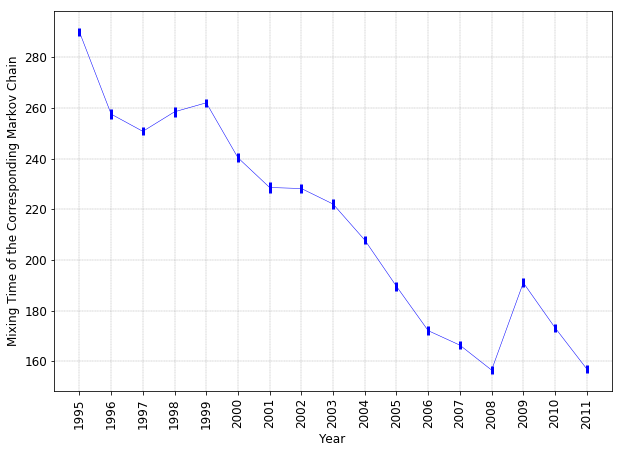

In [14]:
fig = plt.figure(figsize=(10,7))
yerr = 3*Mixing_times_n_times.std(axis=0)
plt.errorbar(range(1,18),Mixing_times_n_times.mean(axis=0), yerr=yerr,fmt='-',color='b',ecolor='b',linewidth=.51, elinewidth=3)
plt.xticks(range(1,18),range(1995,2012))
label = range(1995,2012)
font = {'size'   : 12}
plt.rc('font', **font)
plt.ylabel('Mixing Time of the Corresponding Markov Chain')
plt.xlabel('Year')
plt.xticks(range(1,18),label,rotation=90)

plt.grid(linewidth=.31,color='gray',linestyle='--')
path = './Images/forpaper/Mixing_Time.tiff'
# fig.savefig(path,dpi=300)
plt.show()

# Fig 3. The sequence of Kemeny constants of Markov chains as an aggregate index of globalization
### Lower values indicate more globally connected networks.

In [15]:
Kemenys = []
i = 0
for TM in TMs:
    K, pi = Kemeny_constant(TM)
    Kemenys.append(K)
    i+=1
    print i


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


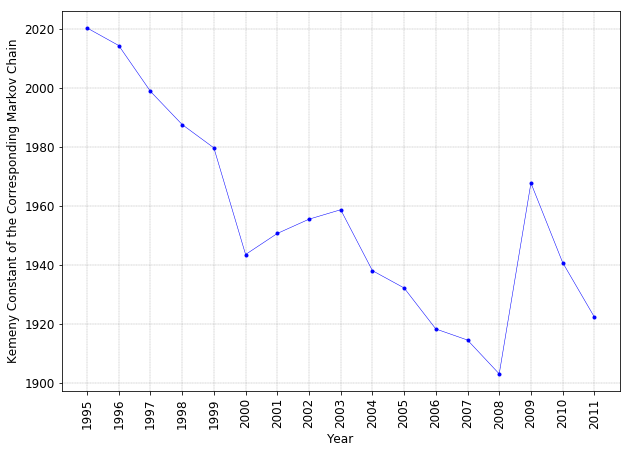

In [16]:
fig = plt.figure(figsize=(10,7))
plt.plot(Kemenys,'.-b',linewidth=.51)
label = range(1995,2012)
plt.xticks(range(17),label,rotation=90)
plt.grid(linewidth=.31,color='gray',linestyle='--')
plt.xlabel('Year')
plt.ylabel('Kemeny Constant of the Corresponding Markov Chain')
font = {'size'   : 12}
plt.rc('font', **font)
path = './Images/forpaper/Kemeny.tiff'
# fig.savefig(path,dpi=300)

# Fig 4. GDP shares of economies (red line) compared with their aggregated structural powers (blue line) over time

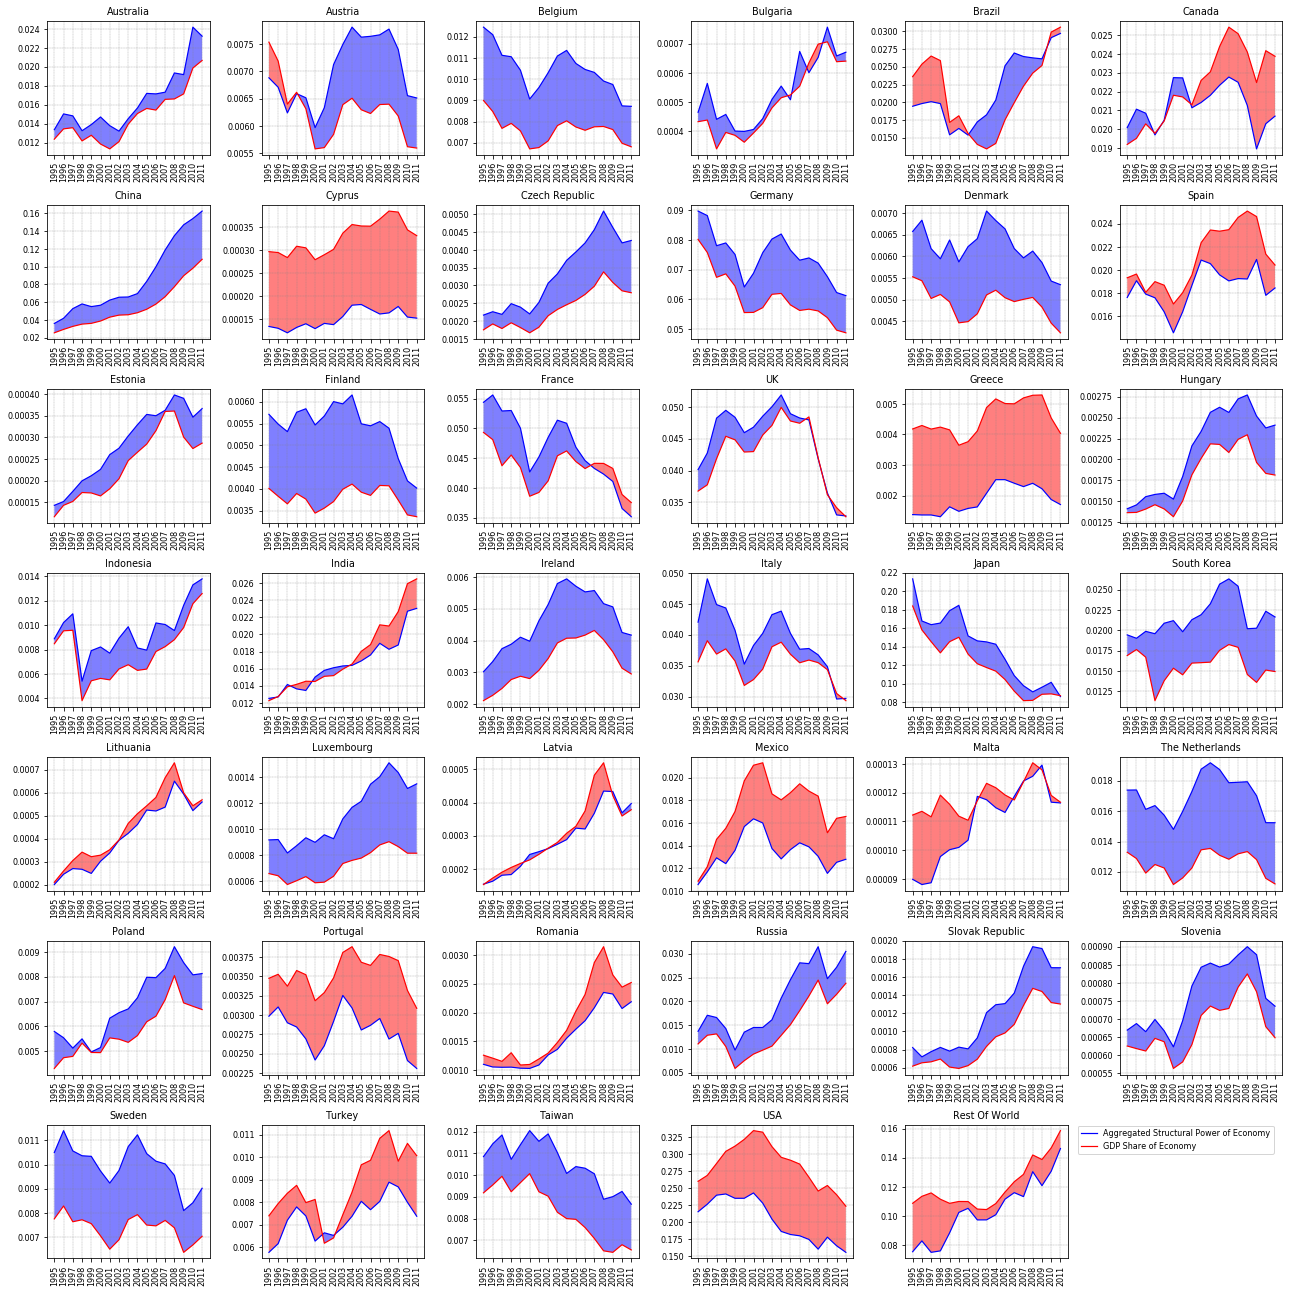

In [43]:

Data_all = np.asarray(Pi).T

fig = plt.figure(figsize=(18,18))
font = {'size'   : 8}
plt.rc('font', **font)
GDP_shares = np.zeros((economy_n,17))
Economies_shares = np.zeros((economy_n,17))
for i in range(economy_n):
    ind_indusrty =   range(i*industry_n,(i+1)*industry_n)
    GDP_shares[i]=VA.values[:,ind_indusrty].sum(axis=1)/VA.values[:].sum(axis=1)
    
    plt.subplot(7,6,i+1)
    plt.title(Countries.Country[i])
    ind_indusrty = range(i*industry_n,(i+1)*industry_n)+ [industry_n*economy_n+i]
    Economies_shares[i]=Data_all[ind_indusrty].T.sum(axis=1)
    
    plt.plot(range(17),Economies_shares[i],'-b',linewidth=1.2,label='Aggregated Structural Power of Economy')
    plt.plot(range(17),GDP_shares[i],'-r',linewidth=1.2,label='GDP Share of Economy')
    y1 = Economies_shares[i]
    y2 = GDP_shares[i]
    x = range(17)
    
    
    
    plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red',alpha=.5, interpolate=True)
    plt.fill_between(x, y1, y2, where= y2 <= y1, facecolor='blue', alpha=.5,interpolate=True)
    path = './Images/forpaper/GDP_Share_Pi.tiff'
    label = range(1995,2012)
    plt.xticks(range(17),label,rotation=90)
    

    plt.tight_layout()
    
    plt.grid(linewidth=.31,color='gray',linestyle='--')

plt.legend(bbox_to_anchor=(2.29,1.022))
# fig.savefig(path,dpi=300)

# Fig 5. Predicted trends of structural potential of different economies

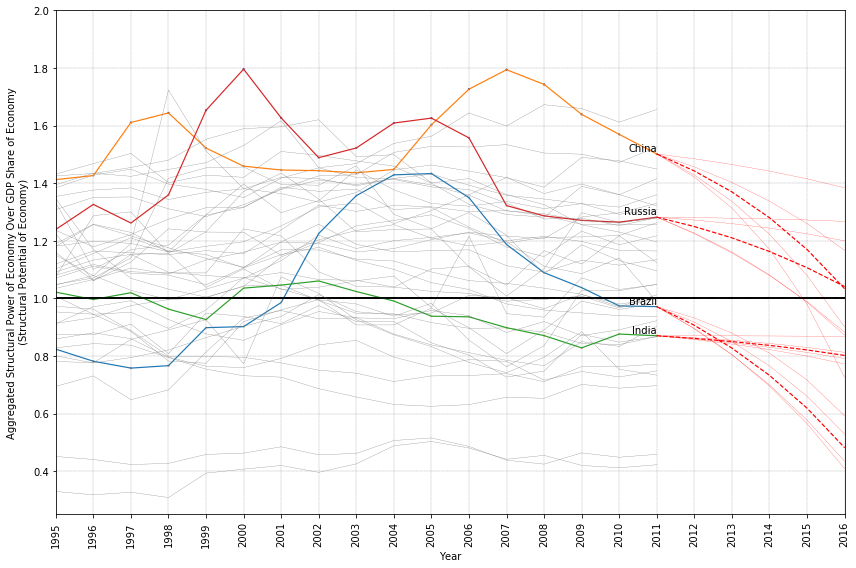

In [19]:
fig = plt.figure(figsize=(12,8))



min_x = np.min(Economies_shares[:,:]/GDP_shares[:,:])
min_y = np.min(GDP_shares[:,:])

max_x = np.max(Economies_shares[:,:]/GDP_shares[:,:])
max_y = np.max(GDP_shares[:,:])
eps = .02

for c in range(economy_n):

    
    x = Economies_shares[c,:]
    color = Economies_shares[c,:]/GDP_shares[c,:]
    x = range(17)
    y = GDP_shares[c,:]
    y = Economies_shares[c,:]
    y = Economies_shares[c,:]/GDP_shares[c,:]
    
    min_x = np.min(Economies_shares[c,:])
    min_y = np.min(GDP_shares[c,:])
    min_min = np.min([min_x,min_y])

    max_x = np.max(Economies_shares[c,:])
    max_y = np.max(GDP_shares[c,:])
    max_max = np.max([max_x,max_y]) 
    eps = .02
    

    ax = plt.gca()
    pred_period = 5
    col = 0
    if Countries.Country[c] in ["Brazil","Russia","China","India"]:
        ax.plot(x,y,'-',linewidth=1.2)
        
        
        all_preds = []
        for span in range(3,7):
            series = y.copy()
            
            y_pred  =update_by_momentum(series,span,pred_period)
            all_preds.append(y_pred)
            y_pred = list(y[-1:]) + y_pred
            x_pred = x[-1:]+ range(17,17+pred_period)
            ax.plot(x_pred,y_pred,'-r',linewidth=0.2)
        y_pred = list(y[-1:]) + list(np.median(all_preds,axis=0))
        x_pred = x[-1:]+ range(17,17+pred_period)
        ax.plot(x_pred,y_pred,'--r',linewidth=1.2)
        
        
        
        ax.scatter(x,y,vmax=1.7,vmin=0.5,c=color,s=20,marker='.',edgecolor='None', cmap='RdYlBu' ,alpha=1)
        ax.annotate(Countries.Country[c], size=10,xy = (x[16],y[-1]+.002), xytext = (0, 0),
                 textcoords = 'offset points', ha = 'right', va = 'bottom')
    else:
        ax.plot(x,y,'gray',linewidth=.3)
    
    

    ax.plot([0,16+pred_period],[1,1],'--k',linewidth=.2)
    
    plt.ylim([.25,2])
    plt.xlim([0,16+pred_period])
    
    
    plt.ylabel('Aggregated Structural Power of Economy Over GDP Share of Economy\n (Structural Potential of Economy)')
    plt.xlabel('Year')
    plt.xticks(range(17+pred_period),range(1995,2012+pred_period), rotation='vertical')

    plt.grid(linewidth=.31,color='gray',linestyle='--')
    plt.tight_layout()
    font = {'size'   : 10}
    plt.rc('font', **font)
    path = './Images/forpaper/GDP_Share_Vs_Pi_Share_trend.tiff'

# fig.savefig(path,dpi=300)

# Sensitivity analysis of Markov chains

In [20]:
# #This takes a lot of time to run. In the next section, you can use the produced data

# ind_selected_economy = np.arange(economy_n)
# ind_selected_economy





# How_much_change = -99


# tminds = [4,9,14,16]
# tminds = [1,2,3,5,6,7,8,10,11,12,13,15]

# for tmind in tminds:
#     TM = TMs[tmind]
#     name_perturbed = []
#     Wrong_TM = []
#     Kemenys_perturbed = []
#     Pi_perturbed = []
#     Pi_diff = []
#     ind = []
#     names = []
#     e0  = time.time()
#     K_normal, pi_normal = Kemeny_constant(TM)
#     for economy in ind_selected_economy:
#         for industry in range(industry_n): 
#             economy_to_perturb = economy
#             industry_to_perturb = industry
#             name_perturbed.append(Countries.Country[economy_to_perturb]+'-'+industry_names[industry_to_perturb])
                                  
# #             
#             Perturbed_TM  = change_node(TM,economy_to_perturb=economy_to_perturb,industry_to_perturb=industry_to_perturb,percent=How_much_change)
            
#             K, pi = Kemeny_constant(Perturbed_TM)
#             pi,mixing_ = simulate_markov(Perturbed_TM,verbose='off')
#             Init_Pi = pi
#             if np.any(pi<0):
# #                     Wrong_TM.append(Perturbed_TM[industry_to_perturb + (economy_to_perturb)*industry_n])
#                     print 'something went wrong!'
#             else:
#                 #we don't calculate the kemeny any longer
#                 Kemenys_perturbed.append(K)
# #                 ind.append(industry + economy_n*industry_n)
#                 Pi_perturbed.append(Init_Pi)
#                 Pi_diff.append(np.asarray(100*(Init_Pi-pi_normal)/pi_normal))
     
#     #For Governments
#     for economy in ind_selected_economy:
#         economy_to_perturb = economy
#         industry_to_perturb = industry_n
#         name_perturbed.append(Countries.Country[economy_to_perturb]+"-Government")
#         Perturbed_TM  = change_node(TM,economy_to_perturb=economy_to_perturb,industry_to_perturb=industry_to_perturb,percent=How_much_change)
            
#         K, pi = Kemeny_constant(Perturbed_TM)
#         pi,mixing_ = simulate_markov(Perturbed_TM,verbose='off')
#         Init_Pi = pi
#         if np.any(pi<0):
# #             Wrong_TM.append(Perturbed_TM[industry_to_perturb + (economy_to_perturb)*industry_n])
#             print 'something went wrong!'
#         else:
#             Kemenys_perturbed.append(K)
# #             ind.append(industry + economy_n*industry_n)
#             Pi_perturbed.append(Init_Pi)
#             Pi_diff.append(np.asarray(100*(Init_Pi-pi_normal)/pi_normal))
                
#     print "Sensitivity of TM {}, in {} second".format(1995+ tmind,time.time() - e0)
    
    
#     columns = []
#     for eco in Countries.Country :
#         for ind in industry_names:
#             columns.append(eco+"-"+ind)
#     for eco in Countries.Country:
#         columns.append(eco+"-Government")

    
#     DF = pd.DataFrame(index=name_perturbed,data=np.asarray(Pi_diff),columns=columns)
#     path = "./Data/WIOD/PerturbationOnIndustries_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(1995+tmind)+".csv"
#     DF.to_csv(path_or_buf=path,header=True,index=True)
    
#     DF = pd.DataFrame(index=['pi_normal'],data=np.asarray(pi_normal)[np.newaxis,:],columns=columns)
#     path = "./Data/WIOD/pi_normal_How_much_change_"+str(How_much_change)+"_year_"+str(1995+tmind)+".csv"
#     DF.to_csv(path_or_buf=path,header=True,index=True)
    
#     DF = pd.DataFrame(index=name_perturbed,data=np.asarray(100*(Kemenys_perturbed-K)/K),columns=['Kemeny_Change_PCT'])
#     path = "./Data/WIOD/Kemeny_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(1995+tmind)+".csv"
#     DF.to_csv(path_or_buf=path,header=True,index=True)
    
#     DF = pd.DataFrame(index=name_perturbed,data=np.asarray(Pi_perturbed),columns=columns)
#     path = "./Data/WIOD/pi_perturbed_How_much_change_"+str(How_much_change)+"_year_"+str(1995+tmind)+".csv"
#     DF.to_csv(path_or_buf=path,header=True,index=True)
    
    



# Fig 6. The effect of 99% slowdown of electrical and optical equipment industry of China
### Left side shows the shocked network in 1995 the right side shows 2011. The green (red) color declares an increase (decrease) in the final share (structural power, π_(t,i)) of the node as a result of the slow down in the selected industry.


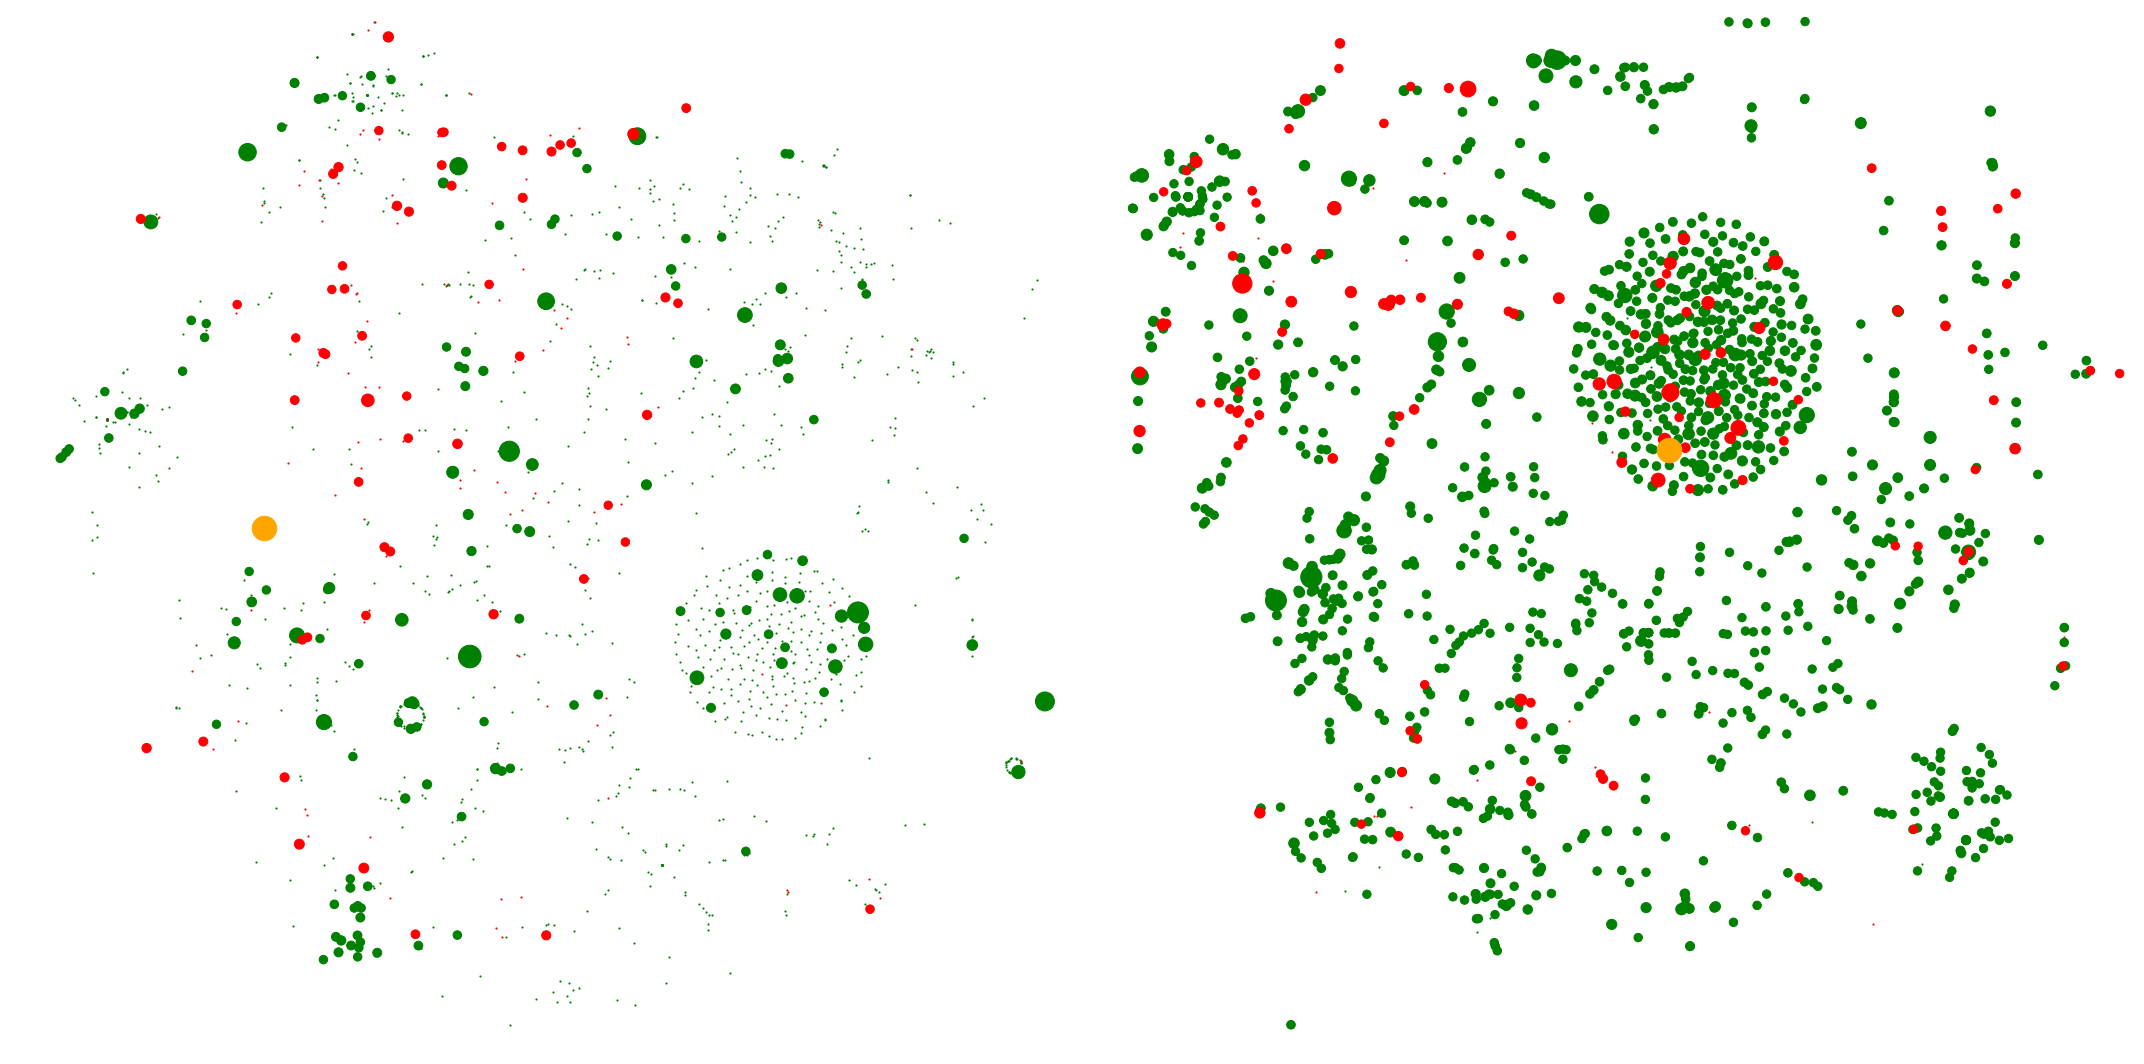

In [137]:
fig = plt.figure(figsize=(30,15))

for i, year in enumerate([1995,2011]):
    plt.subplot(1,2,i+1)
    whichvector = 'Export'
    whichyearnetwork = year
    pct_change_range = 1.0
    economyname = 'China'
    industryname = 'Electrical and Optical Equipment'
    
    
    pi_perturbedpath = "./Data/perturb/pi_perturbed_How_much_change_-99_year_"+str(whichyearnetwork)+".csv"
    pi_perturbed = pd.read_csv(pi_perturbedpath,index_col=0)
    

    pi_normalpath = "./Data/perturb/pi_normal_How_much_change_-99_year_"+str(whichyearnetwork)+".csv"
    pi_normal = pd.read_csv(pi_normalpath,index_col=0)

    
    pi_diff_path ="./Data/perturb/PerturbationOnIndustries_Change_PCT_How_much_change_-99_year_"+str(whichyearnetwork)+".csv"
    pi_diff = pd.read_csv(pi_diff_path,index_col=0)
        
    
    pi_diff = pi_diff.ix[str(economyname+'-'+industryname)].values[:1435]
    perturbed = pi_perturbed.ix[str(economyname+'-'+industryname)].values[:1435]
    normal = pi_normal.values[0,:1435]
    


    path= "./Data/perturb/Economy_map_"+whichvector+"_"+str(whichyearnetwork)+".json"
    #now assume we have it
    import json
    with open(path) as data_file:
        # data = json.load(data_file,'cp1252')
        data = json.load(data_file)
    NETWORK_RESULTS = data
    NETWORK_RESULTS = data
    NETWORK_RESULTS['pi_perturbed'] = list(perturbed*1e4)
    NETWORK_RESULTS['pi_normal'] = list(normal*1e4)
    NETWORK_RESULTS['pi_diff'] = list(pi_diff)
    
    ind_industry = set(np.where(np.asarray(NETWORK_RESULTS['industry'])==industryname)[0])
    ind_economy = set(np.where(np.asarray(NETWORK_RESULTS['economy'])==economyname)[0])
    indmainnode = list(ind_industry.intersection(ind_economy))[0]
    
    indsmall = np.where(np.abs(np.asarray(NETWORK_RESULTS['pi_diff']))< pct_change_range)[0]
    indsmed = np.where(np.abs(np.asarray(NETWORK_RESULTS['pi_diff']))>=pct_change_range)[0]
    
    
    
    
    x = np.asarray(NETWORK_RESULTS['XCoord'])[indsmall]
    y = 1000-np.asarray(NETWORK_RESULTS['YCoord'])[indsmall]
    vals  = np.asarray(NETWORK_RESULTS['pi_diff'])[indsmall]

    plt.scatter(x[vals>=0],y[vals>=0],s=1.3,color='g')
    plt.scatter(x[vals<0],y[vals<0],s=1.3,color='r')
    

    x = np.asarray(NETWORK_RESULTS['XCoord'])[indsmed]
    y = 1000-np.asarray(NETWORK_RESULTS['YCoord'])[indsmed]
    vals  = np.asarray(NETWORK_RESULTS['pi_diff'])[indsmed]
    size =  70 + 3*np.asarray(NETWORK_RESULTS['pi_normal'])/1*(1+np.asarray(NETWORK_RESULTS['pi_diff'])/100)
    size = size[indsmed]
    
    plt.scatter(x[vals>=0],y[vals>=0],s=size[vals>=0],color='g')
    plt.scatter(x[vals<0],y[vals<0],s=size[vals<0],color='r')
    
    
    plt.scatter(np.asarray(NETWORK_RESULTS['XCoord'])[indmainnode],1000-np.asarray(NETWORK_RESULTS['YCoord'])[indmainnode],s=[600], color='orange')


    plt.xlim(-11,1011)
    plt.ylim(-11,1011)
    plt.axis('off')
    plt.tight_layout()

path = './Images/forpaper/perturb_china.tiff'
fig.savefig(path,dpi=400)



# Fig 7. Systemic fragility vs. systemic influence of each industry for the year 2011

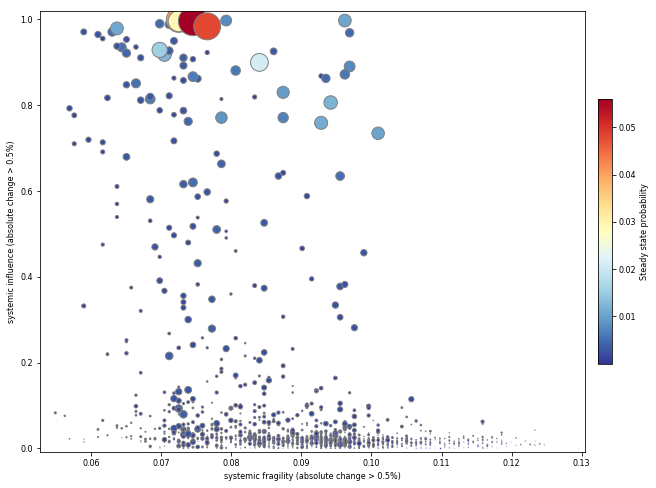

In [44]:


whichyearnetwork = 2011
How_much_change = -99

pi_perturbedpath = "./Data/perturb/pi_perturbed_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_perturbed = pd.read_csv(pi_perturbedpath,index_col=0)

pi_normalpath = "./Data/perturb/pi_normal_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_normal = pd.read_csv(pi_normalpath,index_col=0)

pi_diff_path ="./Data/perturb/PerturbationOnIndustries_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_diff = pd.read_csv(pi_diff_path,index_col=0)



#Systemic Influence Vs. Systemice Fragility


#Threshold of change in pct
thresh = .5

dim = pi_diff.shape[1]
# dim =industry_n*economy_n

#Systemic Influence
no_of_pos_affecting = (pi_diff.values[:dim,:dim]>thresh).sum(axis=1) 
no_of_neg_affecting = (pi_diff.values[:dim,:dim]<-1*thresh).sum(axis=1) 
# s = float(industry_n*economy_n)


ind_pos_affecting = pi_diff.values[:dim,:dim]>thresh
ind_neg_affecting = pi_diff.values[:dim,:dim]<-1*thresh
pos_affecting = np.zeros(dim)
neg_affecting = np.zeros(dim)
for i in range(dim):
    pos_affecting[i] = pi_diff.values[i,ind_pos_affecting[i]].dot(pi_normal.values[0,:dim][ind_pos_affecting[i]])
    neg_affecting[i] = pi_diff.values[i,ind_neg_affecting[i]].dot(pi_normal.values[0,:dim][ind_neg_affecting[i]])


#We want to take out the effect each node on itself
self_change = np.diag(pi_diff.values[:,:dim])*pi_normal.values[0,:dim]
# - np.abs(self_change)
sum_of_affecting = np.abs(neg_affecting) + pos_affecting - np.abs(self_change)
pi_norm = pi_normal.values[0,:dim]

systemic_influence = (no_of_pos_affecting+no_of_neg_affecting)/float(dim)


#Systemic Fragility
no_of_pos_affected = (pi_diff.values[:dim,:dim]>thresh).sum(axis=0)  
no_of_neg_affected = (pi_diff.values[:dim,:dim]<-1*thresh).sum(axis=0) 
# s = float(pi_diff.values[:,:].shape[0])


ind_pos_affected = pi_diff.values[:dim,:dim]>thresh
ind_neg_affected = pi_diff.values[:dim,:dim]<-1*thresh
pos_affected = np.zeros(dim)
neg_affected = np.zeros(dim)
for i in range(dim):
    pos_affected[i] = pi_diff.values[ind_pos_affected[:dim,i],i].sum()*pi_normal.values[0,i]
    neg_affected[i] = pi_diff.values[ind_neg_affected[:dim,i],i].sum()*pi_normal.values[0,i]
######################

systemic_fragility  = (no_of_pos_affected+no_of_neg_affected)/float(dim)

sum_of_affected = np.abs(neg_affected) + pos_affected - np.abs(self_change)



fig = plt.figure(figsize=(10,7))
plt.subplot(1,1,1)



ax = plt.gca()

x = systemic_fragility
y = systemic_influence


p= ax.scatter(x,y,c=pi_norm,s=pi_norm[:dim]*15000,marker='o',edgecolor='gray', cmap=plt.cm.RdYlBu_r ,alpha=1)

plt.plot(x,y,'ob',markersize=.3,alpha=.099)

plt.xlabel('systemic fragility (absolute change > {}%)'.format(thresh))
plt.ylabel('systemic influence (absolute change > {}%)'.format(thresh))

cb =plt.colorbar(p,shrink=.6,pad=.02)
cb.set_label('Steady state probability')


eps= .022
xmin = x.min() - eps*.1 
xmax = x.max() + eps*.05

ymin = y.min() - eps*.4
ymax = y.max() + eps

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

font = {'size'   : 14.}

plt.rc('font', **font)
plt.legend(bbox_to_anchor=(.91,1.0))
plt.tight_layout()
path = './Images/forpaper/Fragility_Influence.tiff'
fig.savefig(path,dpi=300)

# Fig 8. Paradoxical effects of slowing down the activity of economic nodes on Kemeny constant

1476


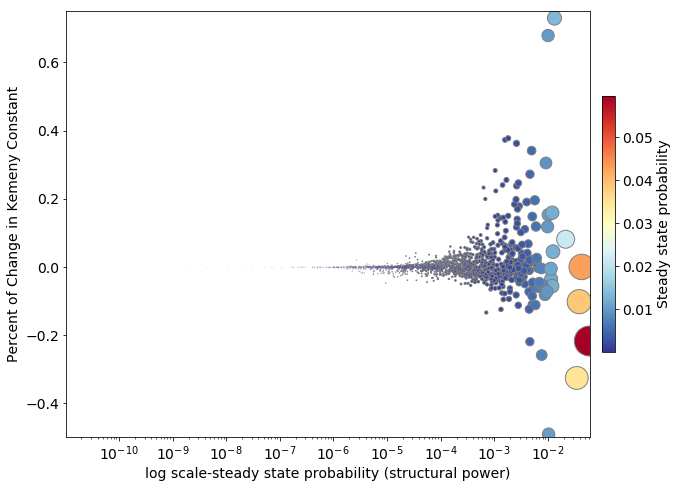

In [46]:
# This is for producing the Figures
#KEMENY CHNAGE
whichyearnetwork = 1995  + 15
How_much_change = -99

Kemeny_Change_PCTpath = "./Data/perturb/Kemeny_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
Kemeny_Change_PCT = pd.read_csv(Kemeny_Change_PCTpath,index_col=0)

pi_normalpath = "./Data/perturb/pi_normal_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_normal = pd.read_csv(pi_normalpath,index_col=0)




#Threshold of change in pct
thresh = .5

dim = pi_normal.shape[1]
# dim =industry_n*economy_n
pi_norm = pi_normal.values[0,:dim]
print dim

fig = plt.figure(figsize=(10,7))
plt.subplot(1,1,1)


ax = plt.gca()

# x = systemic_influence
y = Kemeny_Change_PCT.values[:dim]
x = pi_norm


p= ax.scatter(x,y,c=pi_norm,s=pi_norm[:dim]*15000,marker='o',edgecolor='gray', cmap=plt.cm.RdYlBu_r ,alpha=1)

ax.set_xscale('log')
plt.plot(x,y,'ob',markersize=.3,alpha=.099)
plt.xlabel('log scale-steady state probability (structural power)')
plt.ylabel('Percent of Change in Kemeny Constant')


cb =plt.colorbar(p,shrink=.6,pad=.02)
cb.set_label('Steady state probability')


eps= .022
xmin = x.min() - eps*.1 
xmax = x.max() + eps*.05

ymin = y.min() - eps*.4
ymax = y.max() + eps

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

font = {'size'   : 14.}

plt.rc('font', **font)
plt.legend(bbox_to_anchor=(.91,1.0))
plt.tight_layout()
path = './Images/forpaper/Kemeny_Eigen.tiff'

fig.savefig(path,dpi=300)

## Calculating Systemic Influence, Systemic Fragility and loading all the other measures for all the years from 1995 to 2011

In [23]:
How_much_change = -99
whichyearnetwork = 1995
Kemeny_Change_PCTpath = "./Data/perturb/Kemeny_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
Kemeny_Change_PCT = pd.read_csv(Kemeny_Change_PCTpath,index_col=0)


######################################
sys_fragility_all = pd.DataFrame(index=Kemeny_Change_PCT.index)
sys_influence_all = pd.DataFrame(index=Kemeny_Change_PCT.index)
Kemeny_Change_PCT_all = pd.DataFrame(index=Kemeny_Change_PCT.index)
Pi_normall_all = pd.DataFrame(index=Kemeny_Change_PCT.index)
outdegree_all = pd.DataFrame(index=Kemeny_Change_PCT.index)
indegree_all = pd.DataFrame(index=Kemeny_Change_PCT.index)
######################################

for year in range(1995,2012):
    whichyearnetwork = year
    How_much_change = -99
    Kemeny_Change_PCTpath = "./Data/perturb/Kemeny_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
    Kemeny_Change_PCT = pd.read_csv(Kemeny_Change_PCTpath,index_col=0)

    pi_perturbedpath = "./Data/perturb/pi_perturbed_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
    pi_perturbed = pd.read_csv(pi_perturbedpath,index_col=0)
    
    pi_normalpath = "./Data/perturb/pi_normal_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
    pi_normal = pd.read_csv(pi_normalpath,index_col=0)
    
    pi_diff_path ="./Data/perturb/PerturbationOnIndustries_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
    pi_diff = pd.read_csv(pi_diff_path,index_col=0)
    
    
    
    #Systemic Influence Vs. Systemice Fragility
    #Threshold of change in pct
    thresh = .5
    dim = pi_diff.shape[1]
#     dim =industry_n*economy_n
    
    #Systemic Influence
    no_of_pos_affecting = (pi_diff.values[:dim,:dim]>thresh).sum(axis=1) 
    no_of_neg_affecting = (pi_diff.values[:dim,:dim]<-1*thresh).sum(axis=1) 
    s = float(dim)
    
    
    ind_pos_affecting = pi_diff.values[:dim,:dim]>thresh
    ind_neg_affecting = pi_diff.values[:dim,:dim]<-1*thresh
    pos_affecting = np.zeros(dim)
    neg_affecting = np.zeros(dim)
    for i in range(dim):
        pos_affecting[i] = pi_diff.values[i,ind_pos_affecting[i]].dot(pi_normal.values[0,:dim][ind_pos_affecting[i]])
        neg_affecting[i] = pi_diff.values[i,ind_neg_affecting[i]].dot(pi_normal.values[0,:dim][ind_neg_affecting[i]])

    
    #We want to take out the effect each node on itself
    self_change = np.diag(pi_diff.values[:,:dim])*pi_normal.values[0,:dim]
    # - np.abs(self_change)
    sum_of_affecting = np.abs(neg_affecting) + pos_affecting - np.abs(self_change)
    pi_norm = pi_normal.values[0,:dim]
    
    systemic_influence = (no_of_pos_affecting+no_of_neg_affecting)/s
    

    #Systemic Fragility
    no_of_pos_affected = (pi_diff.values[:dim,:dim]>thresh).sum(axis=0)  
    no_of_neg_affected = (pi_diff.values[:dim,:dim]<-1*thresh).sum(axis=0) 
    # s = float(pi_diff.values[:,:].shape[0])

    
    ind_pos_affected = pi_diff.values[:dim,:dim]>thresh
    ind_neg_affected = pi_diff.values[:dim,:dim]<-1*thresh
    pos_affected = np.zeros(dim)
    neg_affected = np.zeros(dim)
    for i in range(dim):
        pos_affected[i] = pi_diff.values[ind_pos_affected[:dim,i],i].sum()*pi_normal.values[0,i]
        neg_affected[i] = pi_diff.values[ind_neg_affected[:dim,i],i].sum()*pi_normal.values[0,i]
    ######################

    systemic_fragility  = (no_of_pos_affected+no_of_neg_affected)/s

    sys_fragility_all[year] = systemic_fragility
    sys_influence_all[year] = systemic_influence
    Kemeny_Change_PCT_all[year]= Kemeny_Change_PCT.values[:]
    Pi_normall_all[year] = pi_normal.T.values[:]
    outdegree_all[year] = np.sum(TMs[year-1995]>0,axis=1)
    indegree_all[year] = np.sum(TMs[year-1995]>0,axis=0)


In [26]:
# Here we calculate the indiced of the nodes of Rest of the World (ROW) and the Governments. 
# We remove them in some analyses.
i = 40
ind_ROW = range(i*industry_n,(i+1)*industry_n)+ [industry_n*economy_n+i]
ind_GOvs = range(industry_n*economy_n,industry_n*economy_n+economy_n)
ind_all  = range(1476)
ind_all_except_ROW = list(set(ind_all).difference(ind_ROW))
ind_all_except_ROW_GOVS = list(set(ind_all_except_ROW).difference(ind_GOvs))

# Fig 9. The paradoxical effect of slowdown in the activity economic nodes  (except rest of the world) on the Kemeny constants

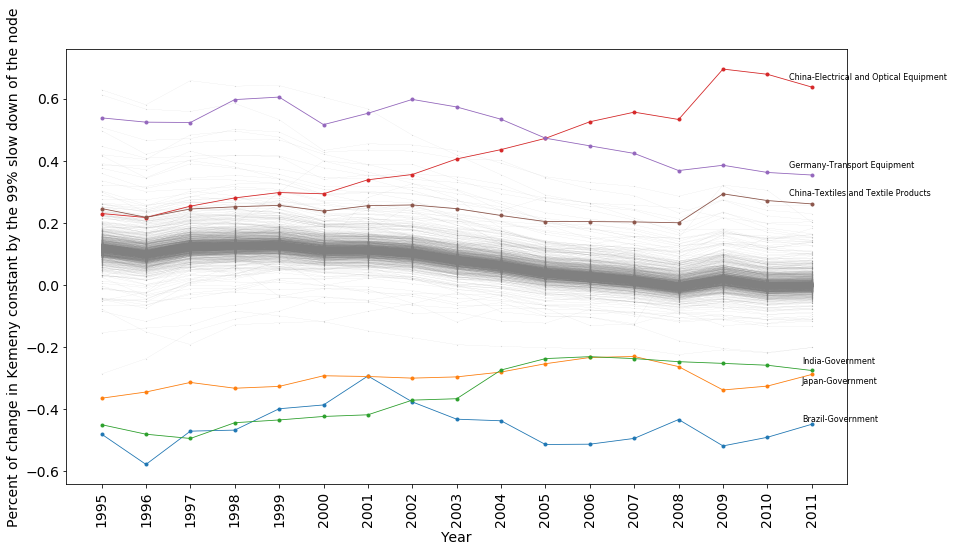

In [27]:
net_index = Kemeny_Change_PCT_all.ix[Kemeny_Change_PCT_all.index[ind_all_except_ROW]].copy()
DF = net_index.sort_values(1995,ascending=False)
positive1995 = DF.index[:10].values[:]

DF = net_index.sort_values(1995,ascending=True)
negative1995 = DF.index[:10].values[:]


DF = net_index.sort_values(2011,ascending=False)
positive2011 = DF.index[:10].values[:]


DF = net_index.sort_values(2011,ascending=True)
negative2011 = DF.index[:10].values[:]



fig = plt.figure(figsize=(14,8));
# plt.plot(Kemeny_Change_PCT_all.values[:].T,'.-',color='gray',linewidth=.1);
plt.plot(net_index.values[:].T,'.-',color='gray',linewidth=.05,markersize=.2);


plt.plot(net_index.ix[negative2011[:3]].values[:].T,'.-',linewidth=.81);


plt.plot(net_index.ix[positive2011[:3]].values[:].T,'.-',linewidth=.81);
# for i in range(3):


i = 0
y = net_index.ix[negative2011[i]][2011]
plt.annotate(negative2011[i], size=8,xy = (16,y+.002), xytext = (-10, 0),
             textcoords = 'offset points', ha = 'left', va = 'bottom');

i =1
y = net_index.ix[negative2011[i]][2011]
plt.annotate(negative2011[i], size=8,xy = (16,y+.002), xytext = (-10, -12),
             textcoords = 'offset points', ha = 'left', va = 'bottom');

i = 2
y = net_index.ix[negative2011[i]][2011]
plt.annotate(negative2011[i], size=8,xy = (16,y+.002), xytext = (-10, 4),
             textcoords = 'offset points', ha = 'left', va = 'bottom');



    
for i in range(3):
    y = net_index.ix[positive2011[i]][2011]
    plt.annotate(positive2011[i], size=8,xy = (16,y+.002), xytext = (-23, 5),
                 textcoords = 'offset points', ha = 'left', va = 'bottom');

plt.ylabel('Percent of change in Kemeny constant by the 99% slow down of the node');
plt.xlabel('Year');
plt.xticks(range(17),range(1995,2012), rotation='vertical');
font = {'size'   : 6.}
plt.rc('font', **font)
path = './Images/forpaper/Percent_of_change_Kemeny.tiff'
# fig.savefig(path,dpi=300)

# Table 1. Top 10 nodes with the highest systemic influence in 2011

In [33]:
year = 2011
dd = np.concatenate((Pi_normall_all.index.values[:][:,np.newaxis],Pi_normall_all[year].values[:][:,np.newaxis],sys_fragility_all[year].values[:][:,np.newaxis],sys_influence_all[year].values[:][:,np.newaxis]),axis=1)
DF = pd.DataFrame(data=dd,columns=['Names','structural power','Systemic Fragility','Systemic Influence'])

DF = DF.ix[DF.index[ind_all_except_ROW]]

DF.head()
DF = DF.sort_values('Systemic Influence',ascending=False)
DF.index = range(1,DF.shape[0]+1)
DF.ix[DF.index[:10]]

,Names,structural power,Systemic Fragility,Systemic Influence
1,China-Government,0.0407637,0.0724932,0.998645
2,Japan-Real Estate Activities,0.00434353,0.0718157,0.997967
3,Brazil-Government,0.0106923,0.096206,0.99729
4,India-Government,0.00788957,0.0792683,0.99729
5,USA-Real Estate Activities,0.00796444,0.0738482,0.995935
6,Japan-Government,0.0294709,0.0724932,0.995935
7,USA-Government,0.0560428,0.0745257,0.995935
8,"USA-Retail Trade, Except of Motor Vehicles and...",0.0049287,0.0731707,0.995257
9,"USA-Wholesale Trade and Commission Trade, Exce...",0.00488901,0.0738482,0.99187
10,USA-Renting of M&Eq and Other Business Activities,0.0116091,0.0718157,0.99187


# Table 2. Top 10 nodes (except rest of the world) with the lowest systemic fragility in 2011

In [34]:
year = 2011
dd = np.concatenate((Pi_normall_all.index.values[:][:,np.newaxis],Pi_normall_all[year].values[:][:,np.newaxis],sys_fragility_all[year].values[:][:,np.newaxis],sys_influence_all[year].values[:][:,np.newaxis]),axis=1)
DF = pd.DataFrame(data=dd,columns=['Names','structural power','Systemic Fragility','Systemic Influence'])


DF = DF.ix[DF.index[ind_all_except_ROW]]

DF.head()
DF = DF.sort_values('Systemic Fragility',ascending=True)
DF.index = range(1,DF.shape[0]+1)
DF.ix[DF.index[:10]]


,Names,structural power,Systemic Fragility,Systemic Influence
1,UK-Electrical and Optical Equipment,0.000292468,0.054878,0.0826558
2,Finland-Electrical and Optical Equipment,0.000137664,0.0562331,0.0758808
3,"Taiwan-Manufacturing, Nec; Recycling",3.36116e-05,0.0569106,0.0223577
4,Germany-Electrical and Optical Equipment,0.00154004,0.0575881,0.776423
5,Germany-Chemicals and Chemical Products,0.00110951,0.0575881,0.710027
6,"Ireland-Machinery, Nec",1.32138e-05,0.0589431,0.0149051
7,Malta-Electrical and Optical Equipment,6.45902e-06,0.0589431,0.0216802
8,USA-Electrical and Optical Equipment,0.00232597,0.0589431,0.970867
9,"Germany-Machinery, Nec",0.00183113,0.0596206,0.719512
10,Denmark-Chemicals and Chemical Products,7.47541e-05,0.0609756,0.0264228


# Table 3. Top 10 nodes (except rest of the world) with the highest positive effects on Kemeny constant in 2011

In [36]:
year = 2011

dd = np.concatenate((Pi_normall_all.index.values[:][:,np.newaxis],Pi_normall_all[year].values[:][:,np.newaxis],sys_influence_all[year].values[:][:,np.newaxis],Kemeny_Change_PCT_all[year].values[:][:,np.newaxis]),axis=1)
DF = pd.DataFrame(data=dd,columns=['Names','structural power','Systemic Influence','Pct of chng Kemeny'])

DF = DF.ix[DF.index[ind_all_except_ROW]]

DF.head()
DF = DF.sort_values('Pct of chng Kemeny',ascending=False)
DF.index = range(1,DF.shape[0]+1)
DF.ix[DF.index[:10]]


,Names,structural power,Systemic Influence,Pct of chng Kemeny
1,China-Electrical and Optical Equipment,0.0109195,0.978997,0.637486
2,Germany-Transport Equipment,0.00282169,0.811653,0.354232
3,China-Textiles and Textile Products,0.00498553,0.970867,0.2612
4,"Germany-Machinery, Nec",0.00183113,0.719512,0.255455
5,Germany-Electrical and Optical Equipment,0.00154004,0.776423,0.230203
6,Germany-Chemicals and Chemical Products,0.00110951,0.710027,0.209375
7,Romania-Government,0.000723924,0.0765583,0.203782
8,Russia-Government,0.0104454,0.734417,0.202094
9,USA-Transport Equipment,0.00252037,0.910569,0.191263
10,"USA-Coke, Refined Petroleum and Nuclear Fuel",0.00264798,0.469512,0.182051


# Table 4- Top 10 nodes (except rest of the world) with the highest negative effects on Kemeny constant in 2011

In [37]:
year = 2011


dd = np.concatenate((Pi_normall_all.index.values[:][:,np.newaxis],Pi_normall_all[year].values[:][:,np.newaxis],sys_influence_all[year].values[:][:,np.newaxis],Kemeny_Change_PCT_all[year].values[:][:,np.newaxis]),axis=1)
DF = pd.DataFrame(data=dd,columns=['Names','structural power','Systemic Influence','Pct of chng Kemeny'])

DF = DF.ix[DF.index[ind_all_except_ROW]]

DF.head()
DF = DF.sort_values('Pct of chng Kemeny',ascending=True)
DF.index = range(1,DF.shape[0]+1)
DF.ix[DF.index[:10]]


,Names,structural power,Systemic Influence,Pct of chng Kemeny
1,Brazil-Government,0.0106923,0.99729,-0.448618
2,Japan-Government,0.0294709,0.995935,-0.28818
3,India-Government,0.00788957,0.99729,-0.275446
4,Mexico-Government,0.00473883,0.968835,-0.201355
5,USA-Government,0.0560428,0.995935,-0.201247
6,Greece-Government,0.000652282,0.0623306,-0.133354
7,Finland-Government,0.00127287,0.105014,-0.116016
8,Spain-Government,0.00610205,0.871951,-0.114455
9,China-Government,0.0407637,0.998645,-0.111065
10,Sweden-Government,0.0030026,0.377371,-0.110952


# Table 5 - Top 10 nodes (except governments and rest of the world) with the highest negative effects on Kemeny constant in 2011

In [38]:
year = 2011
dd = np.concatenate((Pi_normall_all.index.values[:][:,np.newaxis],Pi_normall_all[year].values[:][:,np.newaxis],sys_influence_all[year].values[:][:,np.newaxis],Kemeny_Change_PCT_all[year].values[:][:,np.newaxis]),axis=1)
DF = pd.DataFrame(data=dd,columns=['Names','structural power','Systemic Influence','Pct of chng Kemeny'])

DF = DF.ix[DF.index[ind_all_except_ROW_GOVS]]

DF.head()
DF = DF.sort_values('Pct of chng Kemeny',ascending=True)
DF.index = range(1,DF.shape[0]+1)
DF.ix[DF.index[:10]]


,Names,structural power,Systemic Influence,Pct of chng Kemeny
1,Japan-Real Estate Activities,0.00434353,0.997967,-0.0994393
2,Brazil-Public Admin and Defence; Compulsory So...,0.00153962,0.0264228,-0.0872356
3,"India-Agriculture, Hunting, Forestry and Fishing",0.00157759,0.0528455,-0.0769576
4,USA-Real Estate Activities,0.00796444,0.995935,-0.0739146
5,Australia-Real Estate Activities,0.00132178,0.0121951,-0.0690959
6,France-Real Estate Activities,0.00190527,0.00880759,-0.0678286
7,Japan-Public Admin and Defence; Compulsory Soc...,0.00371188,0.910569,-0.0646992
8,Brazil-Real Estate Activities,0.000888012,0.0216802,-0.0593976
9,Japan-Renting of M&Eq and Other Business Activ...,0.00458614,0.988482,-0.0576155
10,"India-Retail Trade, Except of Motor Vehicles a...",0.000777359,0.0230352,-0.0572433


### Supporting Functions

In [2]:
def update_by_momentum(series,span,pred_period):
    result = [] # first value is same as series
    vals = series[-span-1:]
    for n in range(pred_period):
        momentum_avg = np.mean(np.diff(vals))
        result.append(vals[-1] +momentum_avg )
        vals[-1]= result[-1]

    return result

In [41]:
def aggregate_economy_int_consumptions(WIOT):
    economy_n = 41
    industry_n = 35
    economy_int_consumptions_n =1 
    economy_produsction_costs_n=1
    states_n = economy_n*industry_n+economy_n*1+industry_n*1
    
    economy_income = np.zeros((economy_n*industry_n,economy_n))
    economy_int_consumptions = np.zeros((economy_n*industry_n,economy_n))
    ind = economy_n*industry_n
    for i in range(economy_n):
        # This data are stored in the last columns on the right side of WIOD. 
        # They are in five subcategory that here we just sum them as the final consumption of the government (inc. households)
        col = i*5+ind
        economy_int_consumptions[:,i]=WIOT[:,col:col+5].sum(axis=1)
    
    #I don't know why but sometimes it gets a bit negative?!!! due to change in inventory (5th column of economy consum)
    economy_int_consumptions[economy_int_consumptions<0]=0
    
    # This is Tax, Payements, ...
    industry_production_costs = np.around(WIOT[:].sum(axis=1)-WIOT[:,:economy_n*industry_n].sum(axis=0),decimals=5)

    
    return economy_int_consumptions,industry_production_costs
        
def build_markov_chain_Dense(Q,WIOT,economy_n,industry_n,economy_int_consumptions,industry_production_costs):
    e0 = time.time()
    eps = .001
#     economy_n = 41
#     industry_n = 35
#     economy_int_consumptions_n =1 
#     economy_produsction_costs_n=1
    
    for i in range(0,economy_n*industry_n):
        
        #For industry interactions
        for j in range(0,economy_n*industry_n):
            Q[i,j]=WIOT[j,i]
        
        #For payments of industry to its economy: This is the source of income for the economy
        economy_ind_industry = i/industry_n
        Q[i,economy_n*industry_n+economy_ind_industry]=industry_production_costs[i]
        
        #For economy's costs (i.e. consumptions)
        ind_economy_inTM = economy_n*industry_n
        
        for j in range(economy_n):
            Q[j+ind_economy_inTM,i]=economy_int_consumptions[i,j]

    # We have row stochastic matrix! In the paper we have column stochastic!
    singular_industries = [] 
    for i in range(Q.shape[0]):
        s= sum(Q[i])
        
        if np.sum(Q[i]>0)==1:
            if np.where(Q[i]>0)==i:
                #means absorbing state
                Q[i]=eps
                Q[i,i]=1.
                s= sum(Q[i])
                Q[i]=np.divide(Q[i],s)
            else:
                pass
#             print np.where(Q[i]>0),i,np.sum(Q[:,i]>0)
#             
        if s==0:
            singular_industries.append(i%economy_n)
            Q[i]=eps
            Q[i,i]=1.
            s= sum(Q[i])
            Q[i]=np.divide(Q[i],s)
        else:
            Q[i]=np.divide(Q[i],s)        
    print "Making the TM in {} second".format(time.time() - e0)
#     print np.unique(singular_industries)
#     print "Transition Matrix is ready!"
    return np.around(Q,decimals=10),list(np.unique(singular_industries))
def simulate_markov(TM,verbose='on'):
    e1 = time.time()
    states_n = TM.shape[0]
    pi = np.ones(states_n);  pi1 = np.zeros(states_n);
    pi = np.random.rand(states_n)
    # pi[np.random.randint(1,high=size-1, size=1000)] = 1;
    

#     pi[np.random.randint(1,high=states_n, size=int(.1*states_n))] = np.random.rand(int(.1*states_n));
    pi = pi/pi.sum()
#     print pi.shape
#     print pi.sum()
    # pi[range(int(.1*size))] = 1;

    n = norm(pi - pi1); i = 0;
    diff = []
    while n > 1e-6 and i <1*1e4 :
        pi1 = TM.T.dot(pi).copy()
        n = norm(pi - pi1); i += 1
        diff.append(n)
        pi = pi1.copy()
    if verbose=='on':
        print "Iterating {} times in {}".format(i, time.time() - e1)
    
    mixing_ = i

    return pi1,mixing_
    

In [4]:
def Kemeny_constant(MC):
    from scipy.linalg import eig
    eigval, vl, vr = eig(MC, left=True)
    eigval = np.real(eigval)
    vl = np.real(vl)
    
    eigvec_1 = vl[:,np.argmax(np.abs(eigval))]/vl[:,np.argmax(np.abs(eigval))].sum()
    ind = np.around(eigval,decimals=8)!=1
#     print ind
#     print eigval
    return np.divide(1,(1-eigval[ind])).sum(),eigvec_1


In [5]:
# Sensitivity analysis on a single node
def change_node(M,economy_to_perturb=None,industry_to_perturb=None,percent=10):
    MC = M.copy()
    ind_indusrty_to_perturb_from_their_economy = []
    ind_indusrty_to_perturb_from_specific_industry = []
    
    if industry_to_perturb == industry_n:
        i = industry_n*economy_n + economy_to_perturb
    else:
        i  = industry_to_perturb + (economy_to_perturb)*industry_n
#     print i
#     ind_remain = np.asarray(range(MC.shape[0]))!=i
#     print ind_remain
    MC[i,:]=MC[i,:]*(1+percent*.01)
    MC[:,i]=MC[:,i]*(1+percent*.01)
    
    MC[i,i]=MC[i,i]/(1+percent*.01)
#     MC = MC[ind_remain][:,ind_remain]
    
    for i in range(MC.shape[0]):
        s= sum(MC[i])
#         print s
        if s==0:
            MC[i]=eps
            MC[i,i]=1.
            s= sum(MC[i])
            MC[i]= np.divide(MC[i],s)

        else:
            MC[i]= np.divide(MC[i],s)

    
    return MC


In [6]:
sample_TM1 =np.asarray([[0,0,0.1,0.9,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0.1,0.8,0.1,0,0,0,0,0,0,0,0,0],
[0.1,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0.8,0.1,0.1,0,0,0,0,0,0,0,0,0],
[0.9,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0.9,0.1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0.5,0.5,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0.5,0.5,0,0,0,0],
[0,0,0,0,0,0,0,1.,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.9,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.9],
[0,0,0,0,0,0,0,0,0,0.1,0.1,0.8,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9,0.1],
[0,0,0,0,0,0,0,0,0,0.1,0.8,0.1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0.9,0.1,0,0]])

In [7]:
sample_TM1 =np.asarray([[0,0,0.1,0.9,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0.1,0.8,0.1,0,0,0,0,0,0,0,0,0],
[0.1,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0.8,0.1,0.1,0,0,0,0,0,0,0,0,0],
[0.9,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0.9,0.1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,0.5,0.5,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0.5,0.5,0,0,0,0],
[0,0,0,0,0,0,0,1.,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.9,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.9],
[0,0,0,0,0,0,0,0,0,0.1,0.1,0.8,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9,0.1],
[0,0,0,0,0,0,0,0,0,0.1,0.8,0.1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0.9,0.1,0,0]])